In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
import json
import os

sns.set_theme(style="whitegrid")
plt.style.use('ggplot')


In [25]:

def parse_filename(filename):
    """Parse the filename to extract variables and their values, handling floating point values."""
    # Split the filename by '_', but first remove the file extension if present
    filename_wo_ext = os.path.splitext(filename)[0]
    parts = filename_wo_ext.split('_')
    data = {}
    for i in range(0, len(parts), 2):
        if i+1 < len(parts):
            key = parts[i]
            raw_value = parts[i + 1]
            try:
                # Try to convert to float first (this will work for ints as well)
                value = float(raw_value)
                if value.is_integer():
                    value = int(value)  # Convert to int if the value is a whole number
            except ValueError:
                # If conversion to float fails, keep as string (and handle booleans)
                if raw_value.lower() == 'true':
                    value = True
                elif raw_value.lower() == 'false':
                    value = False
                else:
                    value = raw_value  # Keep the string as is
            data[key] = value
    return data

def create_dataframe_from_files(base_path):
    """Reads all episodes and files, and creates a DataFrame from their filenames."""
    data = []
    # Walk through the directory structure
    for root, dirs, files in os.walk(base_path):
        for filename in files:
            # Skip non-png files
            if not filename.endswith('.png'):
                continue
            file_data = parse_filename(filename)
            # Add additional data about the file location if necessary
            file_data['episode'] = os.path.basename(root) # Assuming the last directory is the episode number
            file_data['filepath'] = os.path.join(root, filename)
            data.append(file_data)

    # Convert list of dictionaries to a DataFrame
    df = pd.DataFrame(data)
    return df

# Example usage
base_path = '../runs/rdqn'
df = create_dataframe_from_files(base_path)
df = df.sort_values(by=['episode', 'step'])
print(df.head())


       step    btn  reward   ep  loc  X  Y  timeout     was episode  \
32708     1      A   -0.01  1.0    0  2  3  1000000  random       1   
32445     2     UP    0.01  1.0    0  2  2  1000000  random       1   
33242     3  RIGHT    0.01  1.0    0  3  2  1000000  random       1   
33326     4  RIGHT    0.01  1.0    0  4  2  1000000  random       1   
32999     5     UP   -0.01  1.0    0  4  2  1000000  random       1   

                                                filepath  
32708  ../runs/rdqn/1/step_1_btn_A_reward_-0.01_ep_1....  
32445  ../runs/rdqn/1/step_2_btn_UP_reward_0.01_ep_1....  
33242  ../runs/rdqn/1/step_3_btn_RIGHT_reward_0.01_ep...  
33326  ../runs/rdqn/1/step_4_btn_RIGHT_reward_0.01_ep...  
32999  ../runs/rdqn/1/step_5_btn_UP_reward_-0.01_ep_1...  


/Users/ahughes/miniconda3/envs/playground/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ahughes/miniconda3/envs/playground/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


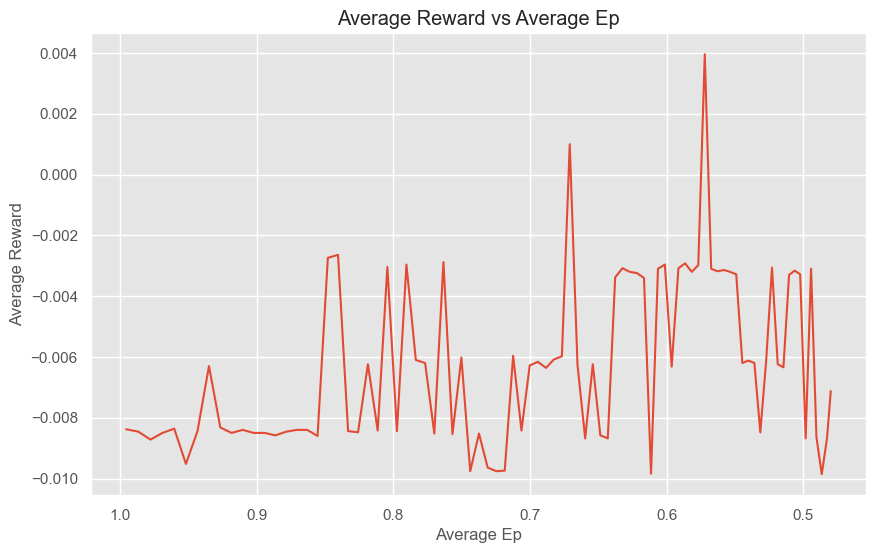

In [26]:
avg_rewards_ep = df.groupby('episode').agg({'reward':'mean', 'ep':'mean'}).reset_index().sort_values(by='ep', ascending=False)

plt.figure(figsize=(10,6))
sns.lineplot(x='ep', y='reward', data=avg_rewards_ep)
plt.gca().invert_xaxis()
plt.xlabel('Average Ep')
plt.ylabel('Average Reward')    
plt.title('Average Reward vs Average Ep')
plt.grid(True)
plt.show()
